In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import random

# Задача 2.7

Бросаются 4 игральные кости. Найти вероятность того, что на них выпадет одинаковое число очков (то есть все 4 одинаковые).

In [5]:
import random
import numpy as np

random.seed(a=42, version=2)

n_exp = 100000

A = list(range(1, 7))

k_success = 0

prob_tmp = []

for i in range(n_exp):
    dice = random.choices(A, k=4)

    if dice[0] == dice[1] and dice[1] == dice[2] and dice[2] == dice[3]:
        k_success += 1
    prob_tmp.append(k_success/(i+1))

p = k_success / n_exp

print("n_exp =", n_exp)
print("Успехов =", k_success)
print("Вероятность (Монте-Карло) =", np.round(p, 6))

# Теоретическое значение для проверки:
# Всего 6 благоприятных вариантов(когда все цифры одинаковы, так как всего на кубике 6 цифр)
# Общее количество вариантов: 6*6*6*6 - всего возможно 6 вариантов значений и 4 кубика
p_theory = 6 / (6**4)
print("Вероятность (теоретическая) =", np.round(p_theory, 6))


n_exp = 100000
Успехов = 456
Вероятность (Монте-Карло) = 0.00456
Вероятность (теоретическая) = 0.00463


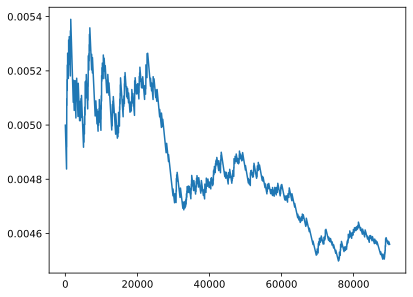

In [10]:
plt.plot(prob_tmp[10000 : 100000]);

На графике видно максимально приближенное значение к теоретическому примерно после 70000 итераций

# Задача 2.14 (карты)

Из колоды 52 карты вынимаются 3 карты. Найти вероятности:

(a) ровно один туз

(b) хотя бы один туз

(c) одна карта туз, другая 3, третья 7 (в любом порядке)

In [11]:
import random
import numpy as np
from math import comb

random.seed(a=12345, version=2)

n_exp = 200000

# Туз "A", валет "J", дама "Q", король "K"
ranks = ["A","2","3","4","5","6","7","8","9","10","J","Q","K"]
deck = []
for r in ranks:
    deck += [r] * 4   # 4 карты каждого ранга

# Счетчики успехов для (a), (b), (c)
count_a = 0   # ровно один туз
count_b = 0   # хотя бы один туз
count_c = 0   # A,3,7

for i in range(n_exp):
    hand = random.sample(deck, 3)      # 3 карты без возвращения

    # (a) ровно один туз(А)
    if hand.count("A") == 1:
        count_a += 1

    # (b) хотя бы один туз(А)
    if hand.count("A") >= 1:
        count_b += 1

    # (c) в руке A, 3 и 7 (порядок не важен)
    if set(hand) == {"A", "3", "7"}:
        count_c += 1

p_a = count_a / n_exp
p_b = count_b / n_exp
p_c = count_c / n_exp

print("n_exp =", n_exp)
print("(a) Ровно один туз:", np.round(p_a, 6))
print("(b) Хотя бы один туз:", np.round(p_b, 6))
print("(c) A,3,7:", np.round(p_c, 6))

# Теоретические значения
# Всего способов выбрать 3 карты: C(52,3)
# (a) 1 туз из 4 и 2 нетуза из 48: C(4,1)*C(48,2) / C(52,3)
p_a_theory = comb(4, 1) * comb(48, 2) / comb(52, 3)

# (b) хотя бы один туз = 1 - (нет тузов): 1 - C(48,3) / C(52,3)
p_b_theory = 1 - comb(48, 3) / comb(52, 3)

# (c) выбрать 1 туз (4 способа), одну "3" (4), одну "7" (4): 4*4*4 / C(52,3)
p_c_theory = (4 * 4 * 4) / comb(52, 3)

print("\nТеория для проверки:")
print("(a) Ровно один туз:", np.round(p_a_theory, 6))
print("(b) Хотя бы один туз:", np.round(p_b_theory, 6))
print("(c) A,3,7:", np.round(p_c_theory, 6))


n_exp = 200000
(a) Ровно один туз: 0.204925
(b) Хотя бы один туз: 0.218165
(c) A,3,7: 0.002785

Теория для проверки:
(a) Ровно один туз: 0.204163
(b) Хотя бы один туз: 0.217376
(c) A,3,7: 0.002896
